<a href="https://colab.research.google.com/github/duhajarrar/TelecomMIT/blob/main/telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
###nibaaalll
#hamza
#raha
import pandas as pd
import numpy as np
trainingData = pd.read_csv("drive/MyDrive/Telecom.csv")


In [5]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
trainingData.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
trainingData['state'] = label_encoder.fit_transform(trainingData['state'])
trainingData['international_plan'] = label_encoder.fit_transform(trainingData['international_plan'])
trainingData['voice_mail_plan'] = label_encoder.fit_transform(trainingData['voice_mail_plan'])
trainingData['churn'] = label_encoder.fit_transform(trainingData['churn'])
#trainingData['phone_number'] = trainingData['phone_number'].str.replace(r'-','')
trainingData[['phone_number']] = trainingData[['phone_number']].apply(pd.to_numeric)


In [25]:
for i in range(len(trainingData.columns)):
  trainingData.rename(columns={trainingData.columns[i]: trainingData.columns[i].replace(r' ','_')}, inplace=True)

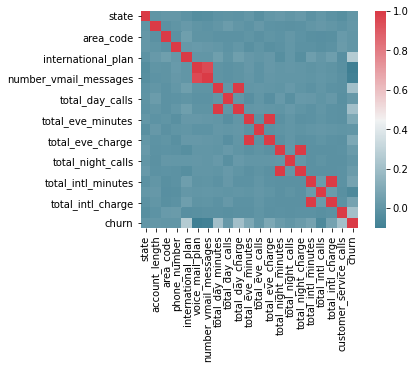

In [26]:
import seaborn as sns
corr = trainingData.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [27]:
col=trainingData.columns
print(col)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


Churn Percentage = 14.491449144914492


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


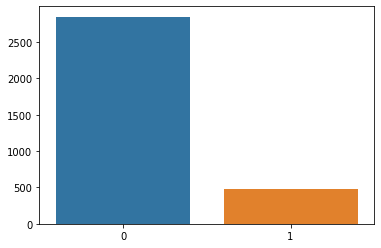

In [30]:
y = trainingData['churn'].value_counts()
sns.barplot(y.index, y.values)
y_True = trainingData["churn"][trainingData["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / trainingData["churn"].shape[0]) * 100 ))

In [31]:
trainingData.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,3.746291e+06,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,2.746626e+05,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,3.508680e+06,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,3.748187e+06,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,3.985970e+06,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,4.229964e+06,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


international_plan


(array([346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

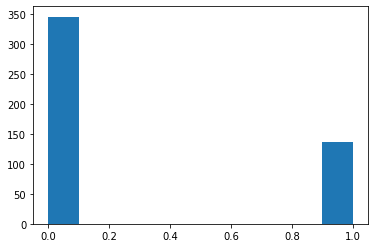

In [33]:
from matplotlib.pyplot import hist
print(col[4])
hist(trainingData[col[4]],weights=trainingData['churn'])

area_code


(array([358.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.]),
 array([408. , 418.2, 428.4, 438.6, 448.8, 459. , 469.2, 479.4, 489.6,
        499.8, 510. ]),
 <a list of 10 Patch objects>)

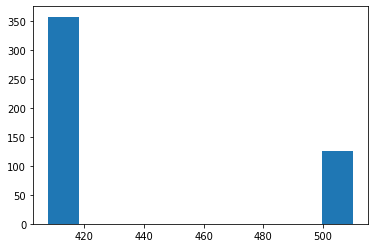

In [34]:
from matplotlib.pyplot import hist
print(col[2])
hist(trainingData[col[2]],weights=trainingData['churn'])

total day minutes


(array([  1.,   9.,  21.,  67.,  87.,  45.,  84., 100.,  49.,  20.]),
 array([  0.  ,  35.08,  70.16, 105.24, 140.32, 175.4 , 210.48, 245.56,
        280.64, 315.72, 350.8 ]),
 <a list of 10 Patch objects>)

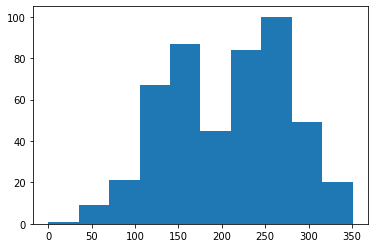

In [ ]:
from matplotlib.pyplot import hist
print(col[7])
hist(trainingData[col[7]],weights=trainingData['churn'])

total_day_charge


(array([  1.,   9.,  21.,  67.,  87.,  45.,  84., 100.,  49.,  20.]),
 array([ 0.   ,  5.964, 11.928, 17.892, 23.856, 29.82 , 35.784, 41.748,
        47.712, 53.676, 59.64 ]),
 <a list of 10 Patch objects>)

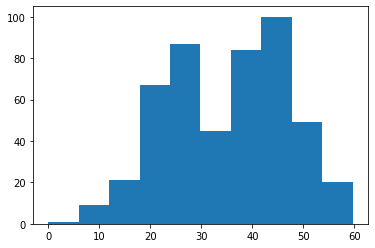

In [35]:
from matplotlib.pyplot import hist
print(col[9])
hist(trainingData[col[9]],weights=trainingData['churn'])

customer_service_calls


(array([ 92., 122.,  87.,  44.,  76.,  40.,  14.,   5.,   1.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

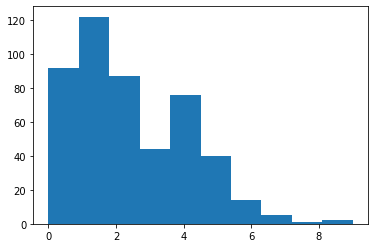

In [36]:
from matplotlib.pyplot import hist
print(col[19])
hist(trainingData[col[19]],weights=trainingData['churn'])

## Churn percentage


In [51]:
import plotly.express as px
fig = px.pie(trainingData, names='churn', title='churn',width=400, height=400)
fig.show()

##Deep Neural Network

In [37]:
%tensorflow_version 2.x

import tensorflow as tf

In [88]:
y=trainingData['churn']
x = trainingData
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
train = x_train.pop('churn')
test = x_test.pop('churn')
print(len(x))
print(len(x_train))
print(len(x_test))

3333
2999
334


In [89]:
x_train.shape

(2999, 20)

In [90]:
x_test.shape

(334, 20)

In [91]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)

In [92]:
my_feature_columns = []
for key in x_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='state', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='account_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='area_code', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='phone_number', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='international_plan', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='voice_mail_plan', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='number_vmail_messages', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='total_day_minutes', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='total_day_calls', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='total_day_charge'

In [93]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    #hidden_units=[256,128,64,32],
    # The model must choose between 3 classes.
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzy95mo40', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [101]:
classifier.train(
    input_fn=lambda: input_fn(x_train, train, training=True),steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzy95mo40/model.ckpt-5000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5000...
INFO:tensorflow:Saving checkpoints for 5000 into /tmp/tmpzy95mo40/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5000...
INFO:tensorflow:loss = 2.293849, step = 5000
INFO:tensorflow:global_step/sec: 271.759
INFO:tensorflow:loss = 53.52761, step = 5100 (0.369 sec)
INFO:tensorflow:global_step/sec: 304.766
INFO:tensorflow:loss = 24.539003, step = 5200 (0.328 sec)
INFO:tensorflow:global_step/sec: 289.604
INFO:tensorflow:loss = 27.850422, step = 5300 (0.347 sec)
INFO:tensorflow:global_step/sec: 327.202
INF

In [105]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(x_test, test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))
deepNeuralNetwork=(eval_result['accuracy']);

# plot_confusion_matrix(lr, x_test, y_test)
# plt.show()


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-21T11:39:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzy95mo40/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.39248s
INFO:tensorflow:Finished evaluation at 2020-12-21-11:39:44
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.83532935, accuracy_baseline = 0.83532935, auc = 0.5, auc_precision_recall = 0.16467066, average_loss = 9.102955, global_step = 10000, label/mean = 0.16467066, loss = 8.957167, precision = 0.0, prediction/mean = 9.336796e-14, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /tmp/tmpzy95mo40/model.ckpt-10000

Test set accuracy: 0.835

83.53%


## Linear Regression

Linear Regression Success Rate : 85.31%


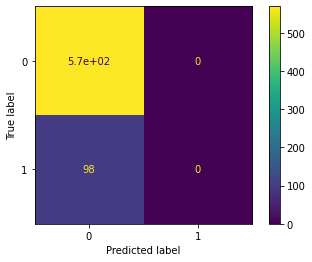

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x = trainingData[['state', 'account_length', 'area_code', 'phone_number','international_plan', 'voice_mail_plan', 'number_vmail_messages','total_day_minutes', 'total_day_calls', 'total_day_charge','total_eve_minutes', 'total_eve_calls', 'total_eve_charge','total_night_minutes', 'total_night_calls', 'total_night_charge','total_intl_minutes', 'total_intl_calls', 'total_intl_charge','customer_service_calls']]
y = trainingData['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
linearRegression=s1;
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, x_test, y_test)
plt.show()

## Gradient Booster Classifier

Gradient Booster Classifier Success Rate : 94.60%


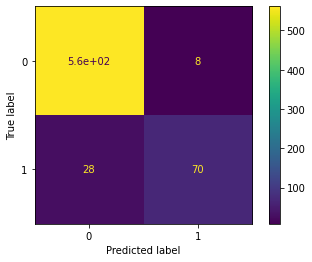

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
p2=gbc.predict(x_test)
s2=accuracy_score(y_test,p2)
gradientBossterClassifier=s2
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()

## Random Forest Classifier

Random Forest Classifier Success Rate : 96.41%


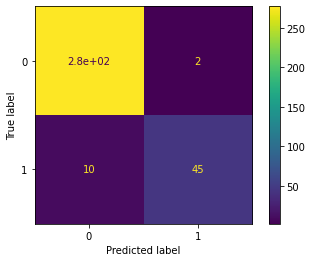

In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
randomForestClassifier=s3;
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

## Support Vector Machine

Support Vector Machine Success Rate : 83.53%


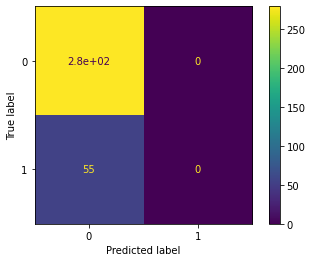

In [116]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
supportVectorMachine=s4;
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

## K Nearest Neighbors

K Nearest Neighbors Top 5 Success Rates:
[83.53, 83.53, 83.53, 83.53, 83.53]


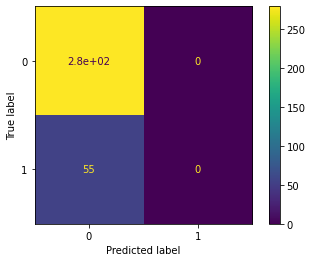

In [114]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p5=knn.predict(x_test)
    s5=accuracy_score(y_test,p5)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])
kNearestNeighbours=max(scorelist)
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

## Decision Tree Classifier

Decision Tree Classifier Top 5 Success Rates:
[93.71, 92.51, 90.42, 90.42, 88.32]


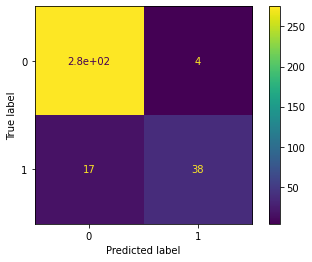

In [112]:
from sklearn.tree import DecisionTreeClassifier
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred)*100)
print("Decision Tree Classifier Top 5 Success Rates:")
print([round(i, 2) for i in sorted(list1, reverse=True)[:5]])
decisionTreeClassifier=max(list1)
plot_confusion_matrix(classifier, x_test, y_test)
plt.show()

## Final Results:

In [128]:
print("Deep Neural Network : ","{:.2f}%".format(100*deepNeuralNetwork))
print("Linear Regression : ","{:.2f}%".format(linearRegression*100))
print("Gradient Booster Classifier :", "{:.2f}%".format(100*gradientBossterClassifier))
print("Random Forest Classifier : ","{:.2f}%".format(randomForestClassifier*100))
print("Support Vector Machine : ","{:.2f}%".format(supportVectorMachine*100))
print("K Nearest Neighbours : ","{:.2f}%".format(kNearestNeighbours))
print("Decision Tree Classifier : ","{:.2f}%".format(decisionTreeClassifier))

Deep Neural Network :  83.53%
Linear Regression :  85.31%
Gradient Booster Classifier : 94.60%
Random Forest Classifier :  96.41%
Support Vector Machine :  83.53%
K Nearest Neighbours :  83.53%
Decision Tree Classifier :  93.71%
